Run Data preparation

(736, 18)
      Tip                                       Dergi İsmi Üniversite İsmi  \
0  Makale  Türk-Alman Üniversitesi Hukuk Fakültesi Dergisi                   
1  Makale  Türk-Alman Üniversitesi Hukuk Fakültesi Dergisi                   
2  Makale  Türk-Alman Üniversitesi Hukuk Fakültesi Dergisi                   
3  Makale  Türk-Alman Üniversitesi Hukuk Fakültesi Dergisi                   

  Gün  Ay   Yıl Cilt Sayı                                             Başlık  \
0  09  11  2020         2  SAĞLIK MESLEĞİ MENSUPLARININ SUÇU BİLDİRMEMESİ...   
1  31  08  2020         2  İMAR PLANLARINDA KAMUSAL KULLANIMA AYRILAN YER...   
2   6  12  2021         2  Evrensel İnsan Hakları Bildirisi’nin 29. Madde...   
3  30  04  2020         2    MEDENÎ USÛL HUKUKUNDA TANIK DELİLİNDEN VAZGEÇME   

                                               Title  \
0  NICHTANZEIGE VON STRAFTATEN DURCH MEDIZINISCHE...   
1  LANGANDAUERNDES UNTERBLEIBEN DES VOLLZUGS BAUP...   
2  Artikel 29 der Allgemeinen 

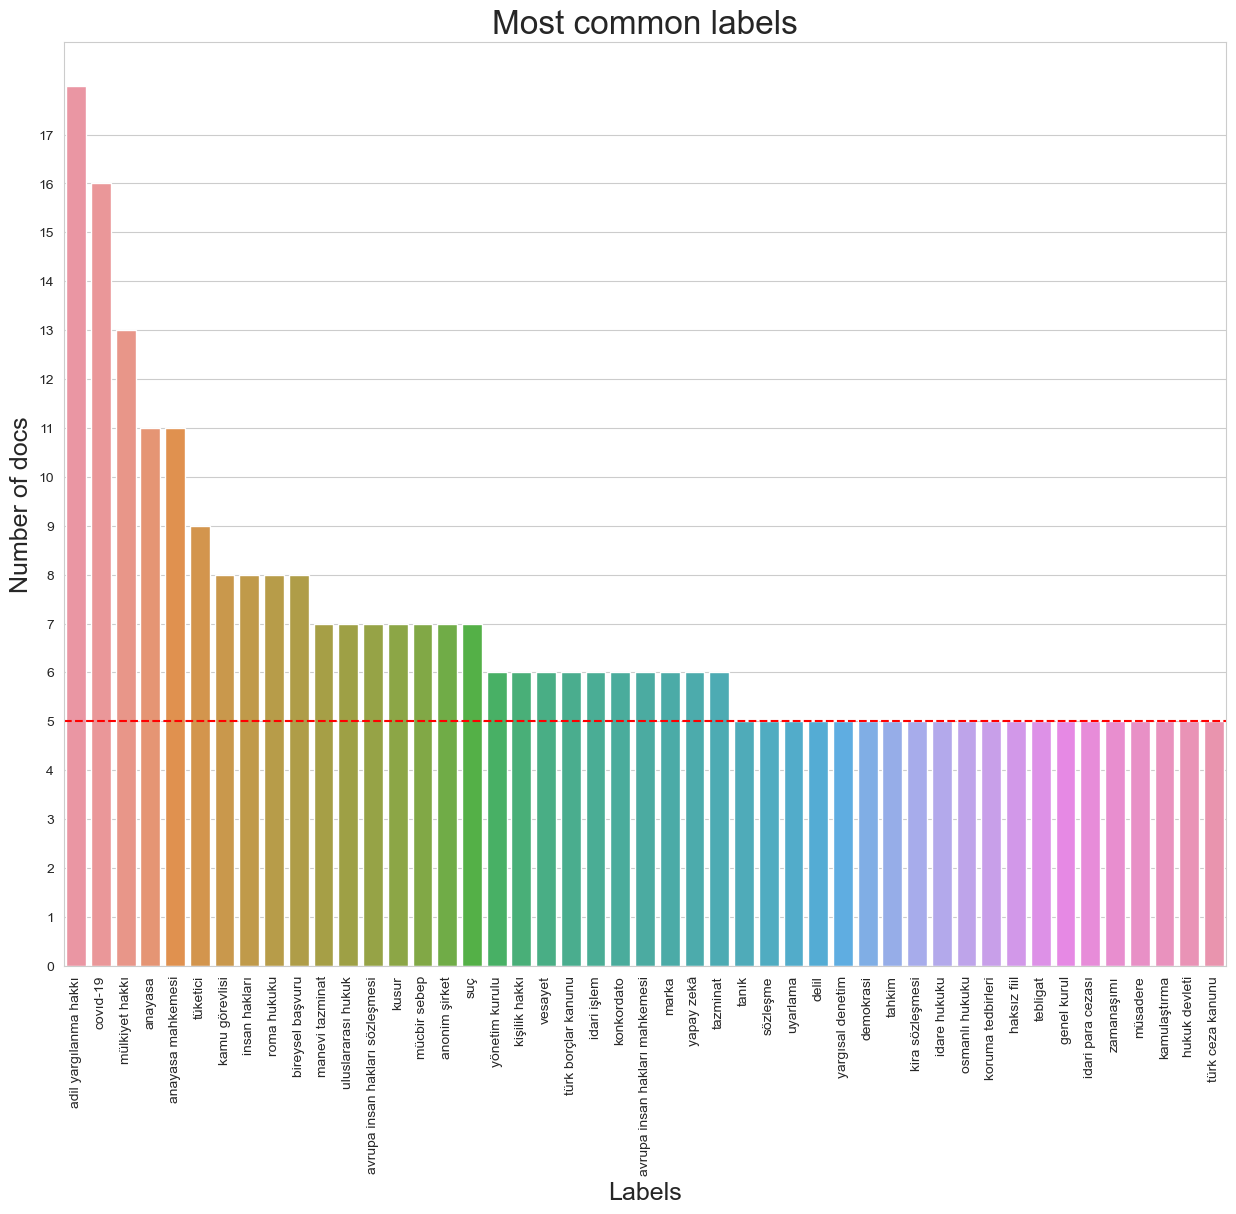

In [1]:
from sklearn.linear_model import LogisticRegression
%run ./00-Data-Preparation.ipynb

using all text data

In [2]:
dfs['Text_Cleaned'] = dfs['Başlık']+' '+dfs['Özet'] +' '+dfs['Metin']

In [3]:
results = []
df_r = pd.DataFrame()
X = dfs['Text_Cleaned']
y = dfs[dfs.columns[19:]]

Let check text data

In [4]:
X.head()

0    sağlık mesleği mensuplarının suçu bildirmemesi...
1    imar planlarında kamusal kullanıma ayrılan yer...
2    evrensel insan hakları bildirisinin 29 maddesi...
3    meden usl hukukunda tanık delilinden vazgeçme ...
4    işyeri devri kamuda çalışan alt işveren işçile...
Name: Text_Cleaned, dtype: object

Let check label data

In [5]:
y.head()

,12 aylık hoşgörü süresi,1808 tarihli fransız ceza muhakemesi kanunu,1855 ve 1884 fransız,1858 ceza kanunu,1864 ve 1871 osmanlı vilayet nizamnameleri,1876,1876 kanun i esasi,1879 tarihli ceza muhakemesi kanunu,1921,1924,...,şirket yönetimi,şirket zararı,şirketin organları,şirketler,şirketler hukuku,şirketler topluluğu,şirketler topluluğunda sorumluluk,şüphe,şüpheli ve sanık hakları,“satış kirayı bozmaz” kuralı
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer


vectorizer = TfidfVectorizer(strip_accents='unicode', analyzer='word', ngram_range=(1, 1), norm='l2')
vectorizer.fit(X)

TfidfVectorizer(strip_accents='unicode')

In [7]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from skmultilearn.problem_transform import LabelPowerset
from sklearn.model_selection import KFold
import pandas as pd


kfold = KFold(n_splits=10, random_state=None, shuffle=False)
for i, (train_index, test_index) in enumerate(kfold.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    X_train = vectorizer.transform(X_train)
    X_test = vectorizer.transform(X_test)

    classifier = LabelPowerset(LinearSVC()) #Best

    classifier.fit(X_train, y_train)
    predictions = classifier.predict(X_test)

    r = classification_report(y_test, predictions, output_dict=True, zero_division=0)
    result = {key: r[key] for key in ['micro avg', 'macro avg', 'weighted avg', 'samples avg']}
    results.append(pd.DataFrame(result))
    print(result)
    print("\n")


sum_results = pd.DataFrame().reindex_like(results[0]).fillna(0)
for x in results:
    sum_results = sum_results.add(x, fill_value=0)

sum_results = sum_results/kfold.n_splits
print(sum_results)

/Users/phitime/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'micro avg': {'precision': 0.1, 'recall': 0.1, 'f1-score': 0.10000000000000002, 'support': 380.0}, 'macro avg': {'precision': 0.010072023407607473, 'recall': 0.011028584289894216, 'f1-score': 0.010285842898942155, 'support': 380.0}, 'weighted avg': {'precision': 0.0956140350877193, 'recall': 0.1, 'f1-score': 0.09535087719298246, 'support': 380.0}, 'samples avg': {'precision': 0.10276705276705277, 'recall': 0.10598455598455597, 'f1-score': 0.10281635150056202, 'support': 380.0}}


/Users/phitime/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'micro avg': {'precision': 0.06702412868632708, 'recall': 0.06648936170212766, 'f1-score': 0.06675567423230976, 'support': 376.0}, 'macro avg': {'precision': 0.007427413909520594, 'recall': 0.007933828494260635, 'f1-score': 0.007539950483907269, 'support': 376.0}, 'weighted avg': {'precision': 0.06382978723404255, 'recall': 0.06648936170212766, 'f1-score': 0.06382978723404255, 'support': 376.0}, 'samples avg': {'precision': 0.06824324324324324, 'recall': 0.07006113256113257, 'f1-score': 0.06786104286104287, 'support': 376.0}}


/Users/phitime/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'micro avg': {'precision': 0.0797872340425532, 'recall': 0.08152173913043478, 'f1-score': 0.08064516129032258, 'support': 368.0}, 'macro avg': {'precision': 0.008102633355840648, 'recall': 0.008215169930227324, 'f1-score': 0.007900067521944632, 'support': 368.0}, 'weighted avg': {'precision': 0.08740942028985507, 'recall': 0.08152173913043478, 'f1-score': 0.08125, 'support': 368.0}, 'samples avg': {'precision': 0.08063063063063063, 'recall': 0.07995495495495496, 'f1-score': 0.07955910455910457, 'support': 368.0}}


/Users/phitime/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'micro avg': {'precision': 0.07202216066481995, 'recall': 0.06788511749347259, 'f1-score': 0.06989247311827958, 'support': 383.0}, 'macro avg': {'precision': 0.008383974791807337, 'recall': 0.008609047940580688, 'f1-score': 0.008383974791807337, 'support': 383.0}, 'weighted avg': {'precision': 0.06744995648389904, 'recall': 0.06788511749347259, 'f1-score': 0.06657963446475196, 'support': 383.0}, 'samples avg': {'precision': 0.07117117117117117, 'recall': 0.06165906165906166, 'f1-score': 0.06494833994833996, 'support': 383.0}}


/Users/phitime/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'micro avg': {'precision': 0.07124681933842239, 'recall': 0.07588075880758807, 'f1-score': 0.07349081364829395, 'support': 369.0}, 'macro avg': {'precision': 0.007202340760747243, 'recall': 0.008018230925050641, 'f1-score': 0.007314877335133918, 'support': 369.0}, 'weighted avg': {'precision': 0.07497741644083107, 'recall': 0.07588075880758807, 'f1-score': 0.07082204155374887, 'support': 369.0}, 'samples avg': {'precision': 0.0780780780780781, 'recall': 0.0761904761904762, 'f1-score': 0.07596422464843519, 'support': 369.0}}


/Users/phitime/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'micro avg': {'precision': 0.23809523809523808, 'recall': 0.26011560693641617, 'f1-score': 0.24861878453038672, 'support': 346.0}, 'macro avg': {'precision': 0.028021607022282242, 'recall': 0.02937204591492235, 'f1-score': 0.02835921674544227, 'support': 346.0}, 'weighted avg': {'precision': 0.2514450867052023, 'recall': 0.26011560693641617, 'f1-score': 0.2524084778420038, 'support': 346.0}, 'samples avg': {'precision': 0.2385135135135135, 'recall': 0.23941441441441438, 'f1-score': 0.23862271362271362, 'support': 346.0}}


/Users/phitime/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'micro avg': {'precision': 0.2616580310880829, 'recall': 0.27520435967302453, 'f1-score': 0.2682602921646747, 'support': 367.0}, 'macro avg': {'precision': 0.03162277740265586, 'recall': 0.03270312851676795, 'f1-score': 0.03174817529982959, 'support': 367.0}, 'weighted avg': {'precision': 0.2797456857402361, 'recall': 0.27520435967302453, 'f1-score': 0.27071493447515244, 'support': 367.0}, 'samples avg': {'precision': 0.27488584474885847, 'recall': 0.2694390084801043, 'f1-score': 0.27174484571744845, 'support': 367.0}}


/Users/phitime/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'micro avg': {'precision': 0.07710843373493977, 'recall': 0.08602150537634409, 'f1-score': 0.08132147395171538, 'support': 372.0}, 'macro avg': {'precision': 0.00911546252532073, 'recall': 0.009284267386900743, 'f1-score': 0.00905919423812739, 'support': 372.0}, 'weighted avg': {'precision': 0.08870967741935484, 'recall': 0.08602150537634409, 'f1-score': 0.0850358422939068, 'support': 372.0}, 'samples avg': {'precision': 0.07748522406056653, 'recall': 0.08576864535768645, 'f1-score': 0.07954194327662245, 'support': 372.0}}


/Users/phitime/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'micro avg': {'precision': 0.079155672823219, 'recall': 0.07228915662650602, 'f1-score': 0.07556675062972291, 'support': 415.0}, 'macro avg': {'precision': 0.00782129191987396, 'recall': 0.008496511366194013, 'f1-score': 0.007827722581267483, 'support': 415.0}, 'weighted avg': {'precision': 0.0783132530120482, 'recall': 0.07228915662650602, 'f1-score': 0.06911072862880091, 'support': 415.0}, 'samples avg': {'precision': 0.08564905414220483, 'recall': 0.08051750380517504, 'f1-score': 0.08102156595307279, 'support': 415.0}}


/Users/phitime/anaconda3/lib/python3.11/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


{'micro avg': {'precision': 0.07541899441340782, 'recall': 0.06716417910447761, 'f1-score': 0.07105263157894737, 'support': 402.0}, 'macro avg': {'precision': 0.00804636506864731, 'recall': 0.008946657663740715, 'f1-score': 0.008350213819491335, 'support': 402.0}, 'weighted avg': {'precision': 0.06011608623548922, 'recall': 0.06716417910447761, 'f1-score': 0.0625207296849088, 'support': 402.0}, 'samples avg': {'precision': 0.07899543378995434, 'recall': 0.07029789084583607, 'f1-score': 0.07266462608928363, 'support': 402.0}}


            micro avg   macro avg  weighted avg  samples avg
precision    0.112152    0.012582      0.114761     0.115642
recall       0.115257    0.013261      0.115257     0.113929
f1-score     0.113560    0.012677      0.111762     0.113474
support    377.800000  377.800000    377.800000   377.800000
